This notebook aims to visualize `bar charts (horizontal)` using synthetic datasets.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

Here are the versions of the libraries I am using:

In [2]:
print('Pandas Version:', pd.__version__, 
      '\nNumpy Version:', np.__version__, 
      '\nSeaborn Version:', sns.__version__,
      '\nMatplotlib Version:', matplotlib.__version__)

Pandas Version: 2.2.2 
Numpy Version: 1.24.3 
Seaborn Version: 0.12.2 
Matplotlib Version: 3.8.4


Let's create a DataFrame with two columns: `Groups` and `Values`. Each group is associated with a specific value.

In [3]:
# Create the DataFrame
df = pd.DataFrame({
    'Groups': ['A', 'B', 'C', 'D'],
    'Values': [12345, 26555, 1113, 4234]
})

df # Display the DataFrame

,Groups,Values
0,A,12345
1,B,26555
2,C,1113
3,D,4234


To display the bars in descending order, let's sort the `Values` before visualization.

In [4]:
df.sort_values(by=['Values'], ascending=False, inplace=True)

Let's create a bar chart!

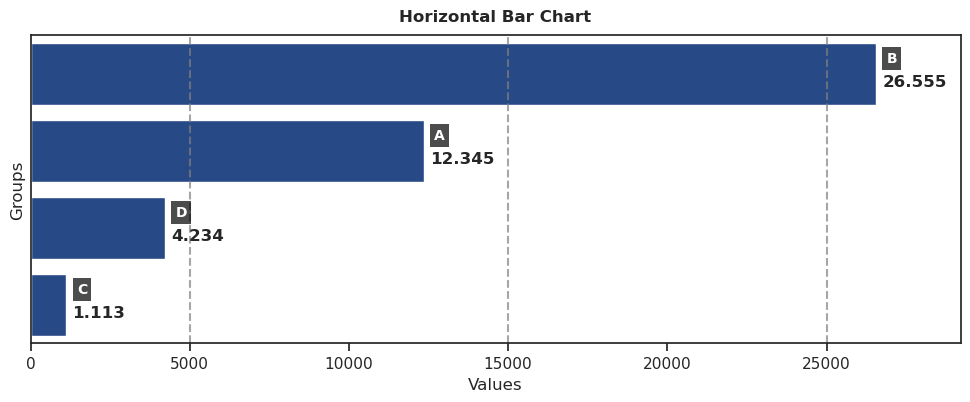

In [5]:
# Set Seaborn style for better aesthetics
sns.set(style="ticks")

# Create figure and axis for horizontal bar chart
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Values', y='Groups', data=df, color='#174496')

# Add value labels to bars
for index, (group, value) in enumerate(zip(df['Groups'], df['Values'])):
    # Display numerical value on the right end of each bar
    num_val_lab = f'{value:,}'.replace(',', '.')
    ax.text(value + 200, index + 0.1, num_val_lab, 
            va='center', fontweight='bold')
    
    # Display group names with a highlighted background for visibility
    ax.text(value + 500, index - 0.2, group, va='center', ha='center', 
            color='white', fontsize=10, fontweight='bold', 
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', pad=3))

# Set axis labels and chart title
plt.xlabel('Values')
plt.title('Horizontal Bar Chart', fontsize=12, weight='bold', pad=10)

# Add reference vertical lines
for vline in [5000, 15000, 25000]:
    ax.axvline(x=vline, linestyle='--', color='gray', alpha=0.7)

# Remove y-axis ticks and labels
ax.set(yticks=[])

# Set x-axis limits dynamically based on the data
plt.xlim(0, df.Values.max() + df.Values.max() / 10)

# Show plot
plt.show()